In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import keras
from keras.layers import Dense, Activation
from keras.models import Sequential

In [2]:
#reading the data
df=pd.read_csv("Data/house_price.csv")
df.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [3]:
df.shape

(1000, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Location    1000 non-null   object
 1   BHK         1000 non-null   int64 
 2   Furnishing  1000 non-null   int64 
 3   Sq.ft       1000 non-null   int64 
 4   Old(years)  1000 non-null   int64 
 5   Floor       1000 non-null   int64 
 6   Price       1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [5]:
df.isna().sum()

Location      0
BHK           0
Furnishing    0
Sq.ft         0
Old(years)    0
Floor         0
Price         0
dtype: int64

In [ ]:
#no missing values to be treated

In [6]:
df.columns

Index(['Location', 'BHK', 'Furnishing', 'Sq.ft', 'Old(years)', 'Floor',
       'Price'],
      dtype='object')

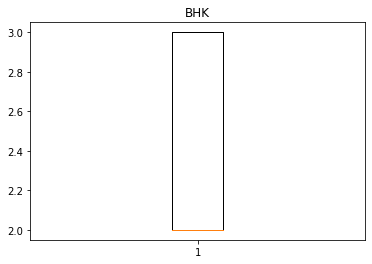

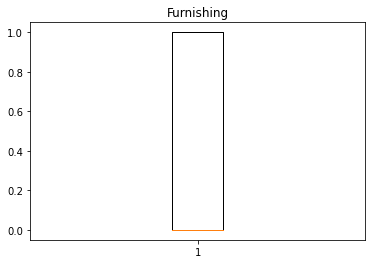

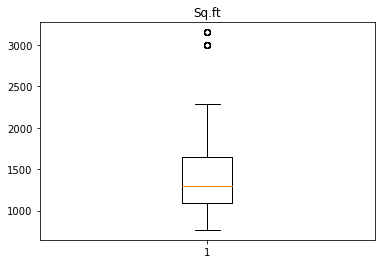

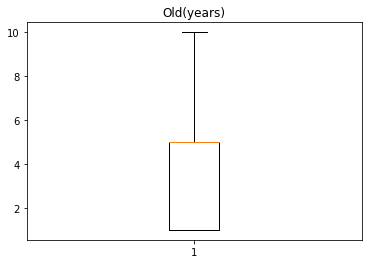

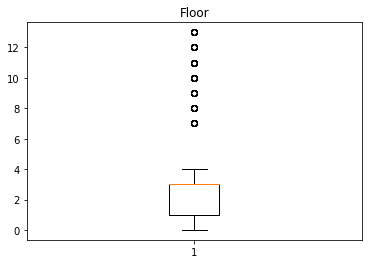

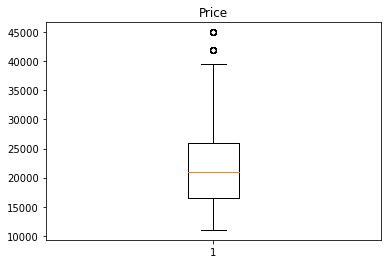

In [7]:
for i in['BHK', 'Furnishing', 'Sq.ft', 'Old(years)', 'Floor','Price']:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [ ]:
#there are some outliers but leaving it as is for first iteration

In [9]:
#label encoding categorical values
lb=LabelEncoder()
df["Location"]= lb.fit_transform(df["Location"])

In [10]:
df.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,0,3,1,3000,1,3,28000
1,0,3,1,1650,10,0,18000
2,1,2,0,1000,5,3,16400
3,1,3,0,1600,1,9,27000
4,1,2,1,1200,5,1,20000


In [14]:
# X,y spliting
X=df.drop('Price',axis =1)
y=df["Price"]

In [15]:
#train _test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# choosing maxdepth for RandomForestRegressor
for i in range(1,25):
    rfc=RandomForestRegressor(max_depth=i)
    rfc.fit(X_train,y_train)
    pred = rfc.predict(X_test)
    print(f'{i}    {r2_score(y_test, pred)}')

1    0.6320385935835433
2    0.8406903813794707
3    0.9137413113129225
4    0.956045187139634
5    0.9796319544208489
6    0.9931217922078037
7    0.9993931685357812
8    0.9999666351859613
9    0.9999999916432905
10    1.0
11    1.0
12    1.0
13    0.9999985636716995
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    0.9999995212238998
20    1.0
21    1.0
22    0.9999990956451441
23    1.0
24    1.0


In [ ]:
# score seems max at max depth =10

In [17]:
# choosing best max depth for DecisionTreeRegressor
for i in range(1,20):
    dtc=DecisionTreeRegressor(max_depth=i)
    dtc.fit(X_train,y_train)
    pred = dtc.predict(X_test)
    print(f'{i}    {r2_score(y_test, pred)}')

1    0.6123985057941428
2    0.8209900646986041
3    0.9097294835511683
4    0.9494901223160119
5    0.9746404917565515
6    0.9924858990479434
7    0.9989459820752257
8    1.0
9    1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0


In [ ]:
#score seems to be max at max depth=8

In [18]:
#linear regression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
r2_score(y_test,pred)

0.8529203286456292

In [19]:
#Decision tree regression
dfr=DecisionTreeRegressor(max_depth=8)
dfr.fit(X_train,y_train)
pred = dfr.predict(X_test)
r2_score(y_test,pred)

1.0

In [20]:
#RandomForestRegressor
rfc=RandomForestRegressor(max_depth=10)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
r2_score(y_test,pred)

1.0

In [ ]:
# maximum score is 100% in bot random forest regressor and decesion tree regressor

In [ ]:
# the accuracy we got is above the required accuracy of 85%

In [ ]:
# successfully created a model as per requirements